In [72]:
# Importing the necessary libraries

import numpy as np 
from matplotlib import pyplot as plt 
import keras 
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import os 
from sklearn.metrics import confusion_matrix
import cv2
import matplotlib.image as mpimg
import seaborn as sns

In [73]:
TRAIN_PATH = "Dataset/Train"
TEST_PATH = "Dataset/Test"

In [80]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model.add((Conv2D(64, (3, 3), activation = 'relu')))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 54, 54, 64)       

In [81]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./ 255,
    shear_range = 0.2,
    zoom_range = 0.2, 
    horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale = 1. / 255)

In [82]:
img_height = 224
img_width = 224

train_generator = train_datagen.flow_from_directory(
    'Dataset/Train Data',
    target_size = (img_height, img_width), 
    batch_size = 32, 
    class_mode = 'binary'
)

train_generator.class_indices
#test_generator[0]

Found 284 images belonging to 2 classes.


{'Covid': 0, 'Non-Covid': 1}

In [83]:
test_generator = test_datagen.flow_from_directory(
    'Dataset/Test Data',
    target_size = (img_height, img_width),
    batch_size = 32, 
    class_mode = 'binary')

test_generator.class_indices

Found 115 images belonging to 2 classes.


{'Covid': 0, 'Non-Covid': 1}

In [132]:
checkpointer = keras.callbacks.ModelCheckpoint(model, verbose = 1, save_best_only = True)

callback = [keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_accuracy'),
            keras.callbacks.TensorBoard(histogram_freq = 0)]

In [133]:
hist = model.fit_generator(
    train_generator, 
    steps_per_epoch = 8, 
    epochs = 10, 
    validation_data = test_generator, 
    validation_steps = 2,
    verbose = 1,
    callbacks = callback)

Epoch 1/10
8/8 [==============================] - 42s 5s/step - loss: 0.1742 - accuracy: 0.9524 - val_loss: 0.4329 - val_accuracy: 0.7500
Epoch 2/10
8/8 [==============================] - 37s 5s/step - loss: 0.1496 - accuracy: 0.9524 - val_loss: 0.2071 - val_accuracy: 0.7451
Epoch 3/10
8/8 [==============================] - 38s 5s/step - loss: 0.0984 - accuracy: 0.9722 - val_loss: 0.6640 - val_accuracy: 0.7344


In [134]:
model.save("my_model.h5")

In [135]:
model.evaluate_generator(train_generator)

[0.04086669906973839, 0.9788732528686523]

In [136]:
model.evaluate_generator(test_generator)

[0.6773365139961243, 0.739130437374115]

In [137]:
model = load_model('my_model.h5')
y_test = []
y_actual = []


In [138]:

for i in os.listdir("Dataset/Test Data/Non-Covid/"):
    img = image.load_img("Dataset/Test Data/Non-Covid/" + i, target_size = (224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    p = model.predict_classes(img)
    y_test.append(p[0, 0])
    y_actual.append(1)
    
for i in os.listdir("Dataset/Test Data/Covid/"):
    img = image.load_img("Dataset/Test Data/Covid/" + i, target_size = (224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    p = model.predict_classes(img)
    y_test.append(p[0, 0])
    y_actual.append(0)

In [139]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [140]:
cm = confusion_matrix(y_actual, y_test)


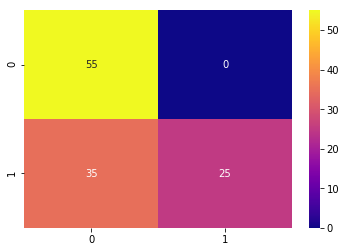

In [141]:

sns.heatmap(cm, cmap = 'plasma', annot = True)
plt.show()

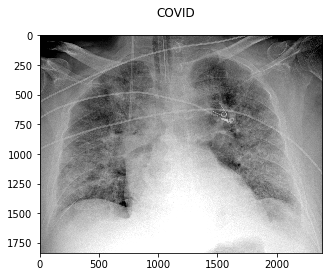

In [142]:
img_src = 'Dataset/Test Data/Covid/covid-19-pneumonia-12.jpg'
img = cv2.imread(img_src)

img_pred = image.load_img(img_src, target_size = (224, 224))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = model.predict(img_pred)

ind = train_generator.class_indices

if rslt[0][0] == 1:
    prediction = "Non-COVID"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

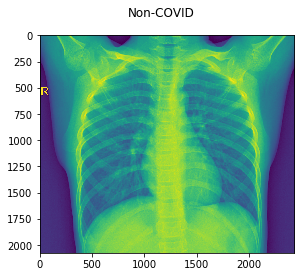

In [143]:

img_src = 'Dataset/Test Data/Non-Covid/IM-0089-0001.jpeg'
img = cv2.imread(img_src)

img_pred = image.load_img(img_src, target_size = (224, 224))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = model.predict(img_pred)

ind = train_generator.class_indices

if rslt[0][0] == 1:
    prediction = "Non-COVID"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)